# Sentiment analysis data exploration

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sentiment_analysis.data_preprocessing import load_data, process_data
from sentiment_analysis.data_preprocessing import create_tfid_weighted_vec
from sentiment_analysis.train import train_classifier
from sentiment_analysis.word_vectors import train_w2v
from sentiment_analysis.visualization import plot_word_vectors, show_wordcloud, show_topics
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_columns', 999)
sns.set_style('darkgrid')
sns.set_context("talk")
sns.set_palette(sns.color_palette("Paired"))
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
n_dim = 40
filename = "train.ft.txt"
data = load_data(filename)
print(f'There are {data.shape[0]} samples')
x_train, x_test, y_train, y_test = process_data(data)

There are 10000 samples


In [3]:
data.head()

,sentiment,text
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [4]:
data['length'] = data['text'].apply(len)
data.groupby('sentiment').mean()

,length
sentiment,
0,450.174416
1,428.841526


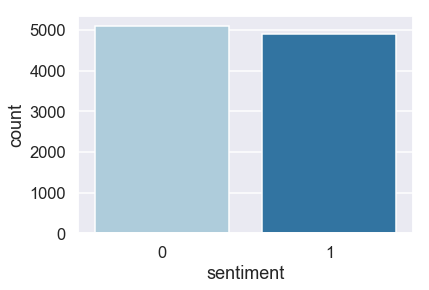

In [5]:
sns.countplot(x='sentiment', data=data)
plt.show()

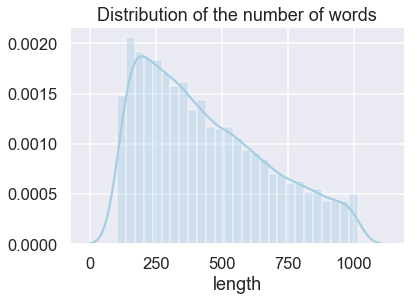

In [6]:
sns.distplot(data['length'])
plt.title('Distribution of the number of words')
plt.show()

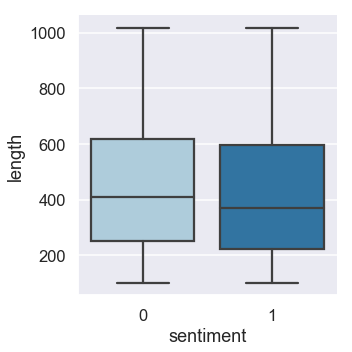

In [7]:
sns.catplot(x="sentiment", y='length', kind='box', data=data) #sns.boxplot ... try
plt.show()

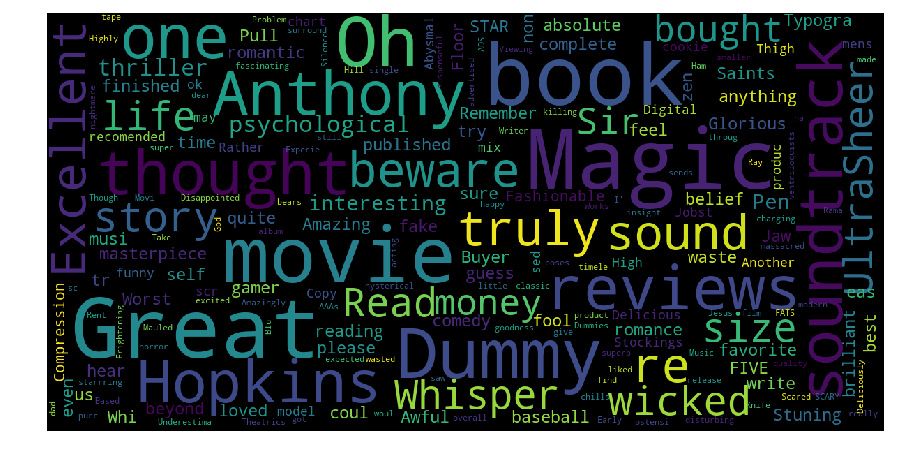

In [8]:
show_wordcloud(data['text'])

In [9]:
#show_topics(x_train)

In [10]:
print(x_train[0][:20])

['queensryche', '&', 'seattle', 'suck', ':', 'this', 'performance', 'is', 'pure', 'garbage', '.', 'unfortunately', 'i', 'was', 'at', 'this', 'pathetic', 'show', '.', 'the']


In [11]:
w2v = train_w2v(x_train, n_dim=n_dim)

len words 7500


In [12]:
w2v.wv['good']

array([-2.2022693 , -2.2411466 , -0.25238085, -1.436278  ,  1.7483807 ,
        2.1658442 , -1.3905671 ,  0.87546176,  1.1226928 , -0.9482328 ,
       -0.53540283, -0.98793525, -0.61806136, -1.0993814 ,  0.97261673,
       -0.4204844 ,  0.30872163, -1.3490728 , -0.91626817, -0.1181665 ,
        0.4220195 , -1.4019312 ,  1.8592246 ,  1.4327694 ,  2.0000474 ,
       -0.82687896, -0.87837833,  1.437641  ,  1.6408092 ,  0.6099592 ,
        1.2991761 ,  0.4592312 ,  0.8017097 , -1.0296029 , -0.76389253,
        0.20968005, -1.0118728 , -0.08859088, -2.3461282 , -0.770523  ],
      dtype=float32)

In [13]:
w2v.wv.most_similar('good')

[('great', 0.8352481722831726),
 ('nice', 0.807991087436676),
 ('fun', 0.7810437679290771),
 ('bad', 0.7704006433486938),
 ('entertaining', 0.7577707767486572),
 ('funny', 0.7372568845748901),
 ('boring', 0.730949878692627),
 ('wonderful', 0.7249009609222412),
 ('overall', 0.6990389227867126),
 ('horrible', 0.6942594051361084)]

In [14]:
n_vectors, dim = w2v.wv.vectors.shape
print(f"there are {n_vectors} vectors of dimension {dim}")

there are 7136 vectors of dimension 40


In [15]:
plot_word_vectors(w2v)

Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7136 samples in 0.053s...
[t-SNE] Computed neighbors for 7136 samples in 5.580s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7136
[t-SNE] Computed conditional probabilities for sample 2000 / 7136
[t-SNE] Computed conditional probabilities for sample 3000 / 7136
[t-SNE] Computed conditional probabilities for sample 4000 / 7136
[t-SNE] Computed conditional probabilities for sample 5000 / 7136
[t-SNE] Computed conditional probabilities for sample 6000 / 7136
[t-SNE] Computed conditional probabilities for sample 7000 / 7136
[t-SNE] Computed conditional probabilities for sample 7136 / 7136
[t-SNE] Mean sigma: 0.090004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.916626
[t-SNE] KL divergence after 1000 iterations: 2.531462


C:\Users\Soriba\Desktop\WPy64-3720\python-3.7.2.amd64\lib\site-packages\bokeh\core\property\container.py:102: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(value, (collections.Container, collections.Sized, collections.Iterable))
C:\Users\Soriba\Desktop\WPy64-3720\python-3.7.2.amd64\lib\site-packages\bokeh\core\property\container.py:102: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return (isinstance(value, (collections.Container, collections.Sized, collections.Iterable))
